In [ ]:
#Image Classification Using Swin Transformer

#Image_resolution = 224 x 224

#patch_size = 4 x 4

#number of features in one patch = 4 x 4 x 3 = 48

#total number of patches in the whole image = 224/4 x 224/4 = 3136

In [4]:
!pip install timm 

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 338.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
    --------------------------------------- 0.0/2.2 MB 145.2 kB/s eta 0:00:16
    --------------------------------------- 0.0/2.2 MB 145.2 kB/s eta 0:00:16
    --------------------------------------

In [6]:
!pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ----------------- ---------------------- 61.4/139.4 kB 3.4 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.4 kB 1.

In [7]:
import torch # It is an open source machine learning library used for developing and training neural network based deep learning models.
import torch.nn as nn
from timm.models.layers import DropPath, to_2tuple, trunc_normal_

In [9]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



# Load the image file
image_path = 'E:/Projects/python/Segmented_Medicinal_Leaf_Images/Basella Alba (Basale)/BA-S-005.jpg'
image = Image.open(image_path)

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224
    transforms.ToTensor()  # Convert the image to a tensor
])

# Apply the transformation to the image
tensor_image = transform(image)

# Reshape the tensor to match the expected shape
tensor_image = tensor_image.unsqueeze(0)  # Add batch dimension

# Print the shape and data type of the tensor
print("Tensor shape:", tensor_image.shape)
print("Tensor data type:", tensor_image.dtype)

# Permute dimensions to match the expected shape (B, H, W, C)
tensor_image = tensor_image.permute(0, 2, 3, 1)

Tensor shape: torch.Size([1, 3, 224, 224])
Tensor data type: torch.float32


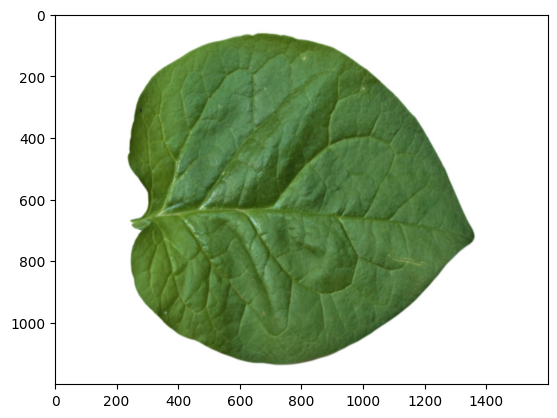

In [21]:
img = Image.open("E:/Projects/python/Segmented_Medicinal_Leaf_Images/Basella Alba (Basale)/BA-S-005.jpg")
plt.imshow(img)
plt.show()

In [22]:
def window_partition(x, patch_size=4):
    """
    Args:
        x: (B, H, W, C)
        patch_size (int): patch size (Default: 4)
        
    Returns:
        patches: (num_patches * B, patch_size, patch_size, C)
                 (num_windows * B, patch_size, patch_size, C)
    """
    
    B, H, W, C = x.shape
    
    # Calculate the number of patches in each dimension
    num_patches_h = H // patch_size # height/patch_size
    num_patches_w = W // patch_size # width/patch_size
    
    # Convert to (B, num_patches_h, patch_size, num_patches_w, patch_size, C) 
    x = x.view(B, num_patches_h, patch_size, num_patches_w, patch_size, C)
    
    # Convert to (B, num_patches_h, num_patches_w, patch_size, patch_size, C)
    patches = x.permute(0, 1, 3, 2, 4, 5).contiguous()
    
    # Efficient Batch Computation - Convert to (B * num_patches_h * num_patches_w, patch_size, patch_size, C)
    patches = patches.view(-1, patch_size, patch_size, C)
    
    return patches

In [ ]:
# Call the window_partition function on the tensor_image
window_size = 4
windows = window_partition(tensor_image, window_size)

num_patches, patch_size, _, _ = windows.shape

# Print the shape of the output windows
print("Windows shape:", windows.shape)

print("num_patches ",num_patches)

# Calculate the number of rows and columns in the grid
num_rows = int(num_patches ** 0.5)
num_cols = num_patches // num_rows

# Create a subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate over the patches and plot them
for i, ax in enumerate(axs.flat):
    patch = windows[i].numpy()
    ax.imshow(patch)
    ax.axis("off")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# (224/4 * 224/4 =56*56 = 3136 patches of size 4*4)

Windows shape: torch.Size([3136, 4, 4, 3])
num_patches  3136
